In [1]:
# State of thr graph

from typing_extensions import TypedDict

class State(TypedDict):
    graph_state:str

In [2]:
#Nodes 

State['graph_state']

__main__.State['graph_state']

In [24]:
# defining nodes

def node1(state):
    print('before node1',state['graph_state'])
    print('--------Node1-------')
    return {"graph_state":state['graph_state']+'Welcome'}

def node2(state):
    print('before node2',state['graph_state'])
    print('--------Node2-------')
    return {"graph_state":state['graph_state']+'to the datahack Summit!'}

def node3(state):
    print('before node2',state['graph_state'])
    print('--------Node3-------')
    return {"graph_state":state['graph_state']+'to Bengaluru'}


In [25]:
import random
from typing import Literal

def decide_node(state) -> Literal['node2','node3']:
    user_input = state['graph_state']
    if random.random() < 0.5:
        return "node2"
    return "node3"

In [26]:
print(random.random())

0.21276563233208667


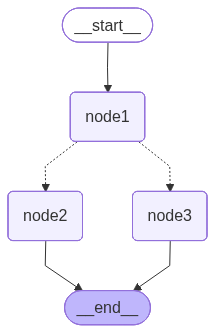

In [27]:
from IPython.display import Image, display
from langgraph.graph import StateGraph,START,END

#build graph
builder = StateGraph(State)

#defining the nodes
builder.add_node("node1",node1)
builder.add_node("node2",node2)
builder.add_node("node3",node3)

#defining the edges
builder.add_edge(START,'node1')
builder.add_conditional_edges('node1',decide_node)
builder.add_edge('node2',END)
builder.add_edge('node3',END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))



In [28]:
graph.invoke({"graph_state":"Hi there,it's Aswin! "})

before node1 Hi there,it's Aswin! 
--------Node1-------
before node2 Hi there,it's Aswin! Welcome
--------Node3-------


{'graph_state': "Hi there,it's Aswin! Welcometo Bengaluru"}

In [44]:
from pprint import pprint
from langchain_core.messages import AIMessage,HumanMessage

messages = [AIMessage(content="Hello ,I'm your virtual travel assistant for Bengaluru ,How can I help you plan your visit?",name='Agent')]
print(type(messages))
messages.append(HumanMessage(content="I'm visiting Bengaluru for the first time. Can you suggest key places to see?", name="User"))
messages.append(AIMessage(content="Certainly. Some must-visit places include Lalbagh Botanical Garden, Bangalore Palace, and Cubbon Park. Are you interested in cultural sites, nature, or food experiences?", name="Agent"))
messages.append(HumanMessage(content="I'm interested in a mix of history and local cuisine.", name="Miguel"))
messages.append(AIMessage(content="Great choice. You can explore Tipu Sultan's Summer Palace for history, then head to VV Puram Food Street for authentic local dishes.", name="Agent"))

for msg in messages:
    msg.pretty_print()

<class 'list'>
================================== Ai Message ==================================
Name: Agent

Hello ,I'm your virtual travel assistant for Bengaluru ,How can I help you plan your visit?
================================ Human Message =================================
Name: User

I'm visiting Bengaluru for the first time. Can you suggest key places to see?
================================== Ai Message ==================================
Name: Agent

Certainly. Some must-visit places include Lalbagh Botanical Garden, Bangalore Palace, and Cubbon Park. Are you interested in cultural sites, nature, or food experiences?
================================ Human Message =================================
Name: Miguel

I'm interested in a mix of history and local cuisine.
================================== Ai Message ==================================
Name: Agent

Great choice. You can explore Tipu Sultan's Summer Palace for history, then head to VV Puram Food Street for authentic lo

In [99]:
from dotenv import load_dotenv
load_dotenv()
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model ='o4-mini-2025-04-16')
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x7c4db9fa51c0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x7c4db9fac350>, root_client=<openai.OpenAI object at 0x7c4dbb586b40>, root_async_client=<openai.AsyncOpenAI object at 0x7c4dbb586ff0>, model_name='o4-mini-2025-04-16', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [100]:
result = llm.invoke(messages)
result.pretty_print()

================================== Ai Message ==================================

Here’s a 1–2-day plan blending Bengaluru’s rich history with its mouth-watering local eats:

Day 1 – Heritage & South-Indian Classics  
1. Tipu Sultan’s Summer Palace (Lalbagh Road)  
   - Late-18th-century teak structure with ornate arches and frescoes.  
   - Spend 45–60 minutes exploring the gardens and museum exhibits.  
2. Bangalore Fort & Kemp Fort Hill (near KR Market)  
   - Remnants of Tipu’s fortifications, bastions and the Delhi Gate.  
   - Quick stroll through the adjacent KR Market for flower stalls and local vibe.  
3. Lunch at Mavalli Tiffin Rooms (MTR) or Vidyarthi Bhavan  
   - Iconic South-Indian breakfast/lunch spots since the 1920s.  
   - Try their rava idli, masala dosa and strong filter coffee.  
4. Visvesvaraya Industrial & Technological Museum (Cubbon Park)  
   - Hands-on science exhibits—fun and educational.  
   - If time allows, visit the nearby Attara Kacheri (High Court bui

In [101]:

result.content

'Here’s a 1–2-day plan blending Bengaluru’s rich history with its mouth-watering local eats:\n\nDay 1 – Heritage & South-Indian Classics  \n1. Tipu Sultan’s Summer Palace (Lalbagh Road)  \n   - Late-18th-century teak structure with ornate arches and frescoes.  \n   - Spend 45–60 minutes exploring the gardens and museum exhibits.  \n2. Bangalore Fort & Kemp Fort Hill (near KR Market)  \n   - Remnants of Tipu’s fortifications, bastions and the Delhi Gate.  \n   - Quick stroll through the adjacent KR Market for flower stalls and local vibe.  \n3. Lunch at Mavalli Tiffin Rooms (MTR) or Vidyarthi Bhavan  \n   - Iconic South-Indian breakfast/lunch spots since the 1920s.  \n   - Try their rava idli, masala dosa and strong filter coffee.  \n4. Visvesvaraya Industrial & Technological Museum (Cubbon Park)  \n   - Hands-on science exhibits—fun and educational.  \n   - If time allows, visit the nearby Attara Kacheri (High Court building).  \n5. Evening at VV Puram Food Street (Visvesvaraya Layout)

In [102]:

def multiply(a:int,b:int) -> int :
    """ 
    Multiply a and b

    """
    return a*b

llm_with_tools = llm.bind_tools([multiply])
print(llm_with_tools)

bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x7c4db9fa51c0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x7c4db9fac350>, root_client=<openai.OpenAI object at 0x7c4dbb586b40>, root_async_client=<openai.AsyncOpenAI object at 0x7c4dbb586ff0>, model_name='o4-mini-2025-04-16', model_kwargs={}, openai_api_key=SecretStr('**********')) kwargs={'tools': [{'type': 'function', 'function': {'name': 'multiply', 'description': 'Multiply a and b', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}]} config={} config_factories=[]


In [92]:
no_tool_call = llm_with_tools.invoke(
    [HumanMessage(content='Hey! How are you ?',name = 'User')]
)

In [93]:
no_tool_call.pretty_print()

================================== Ai Message ==================================

Hi! I’m doing well, thanks for asking. How are you? What can I help you with today?


In [94]:
no_tool_call.content

'Hi! I’m doing well, thanks for asking. How are you? What can I help you with today?'

In [104]:
tool_call  = llm_with_tools.invoke(
    [HumanMessage(content=f"multilpy(5,6)",name='User')]
)
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xDkBH7wkY6XetfUo8ZDSp06r', 'function': {'arguments': '{"a":5,"b":6}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 218, 'prompt_tokens': 55, 'total_tokens': 273, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 192, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o4-mini-2025-04-16', 'system_fingerprint': None, 'id': 'chatcmpl-CTiCtEQHv7MZRl0fojjCGGpROnfT5', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--cf346195-263d-481c-bbbd-38402a27b552-0', tool_calls=[{'name': 'multiply', 'args': {'a': 5, 'b': 6}, 'id': 'call_xDkBH7wkY6XetfUo8ZDSp06r', 'type': 'tool_call'}], usage_metadata={'input_tokens': 55, 'output_tokens': 218, 'total_tokens': 273, 'input_token_details': {'audio': 0, 'cache_read': 

In [105]:
tool_call.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  multiply (call_xDkBH7wkY6XetfUo8ZDSp06r)
 Call ID: call_xDkBH7wkY6XetfUo8ZDSp06r
  Args:
    a: 5
    b: 6


In [106]:
tool_call.content

''

In [107]:
tool_call.tool_calls

[{'name': 'multiply',
  'args': {'a': 5, 'b': 6},
  'id': 'call_xDkBH7wkY6XetfUo8ZDSp06r',
  'type': 'tool_call'}]

In [127]:
from langgraph.graph import MessagesState
class MessagesState(MessagesState):
    pass

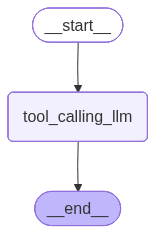

In [128]:
from IPython.display import Image, display
from langgraph.graph import StateGraph,START,END

#node
def tool_calling_llm(state:MessagesState):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_edge(START,'tool_calling_llm')
builder.add_edge('tool_calling_llm',END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [129]:
messages = graph.invoke({"messages":HumanMessage(content = "Hey there,I'm Aswin")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hey there,I'm Aswin
================================== Ai Message ==================================

Hello Aswin! Great to meet you. How can I assist you today?


In [130]:
messages = graph.invoke({"messages":HumanMessage(content = "what is the product of 2 and 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is the product of 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_8X3YZbJcO2Me4YTE4lAIpKuG)
 Call ID: call_8X3YZbJcO2Me4YTE4lAIpKuG
  Args:
    a: 2
    b: 3


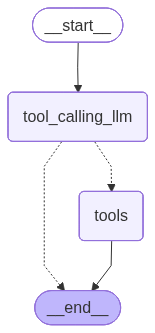

In [131]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

#Node

def tool_calling_llm(state:MessagesState):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}


builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode([multiply]))

builder.add_edge(START,'tool_calling_llm')
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition ,
)
builder.add_edge("tools",END)
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [134]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content='What is 5 multiplied by 4?')]
response = graph.invoke({"messages":messages})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 4?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_u9dFIfh1aeY97yQcWjeiuyd2)
 Call ID: call_u9dFIfh1aeY97yQcWjeiuyd2
  Args:
    a: 5
    b: 4
================================= Tool Message =================================
Name: multiply

20


In [143]:
from langchain_openai import ChatOpenAI

def multiply(a:int,b:int) -> int:
    """
    Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a*b

def add(a:int,b:int)-> int:
    """
     Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a+b

def divide(a:int,b:int)-> int:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a/b

tools = [multiply,add,divide]

In [150]:
llm = ChatOpenAI(model ='o4-mini-2025-04-16')
llm_with_tools = llm.bind_tools(tools)

In [151]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage,SystemMessage

sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic operations")

def assistant(state:MessagesState):
    return {"messages":[llm_with_tools.invoke([sys_msg]+state['messages'])]}

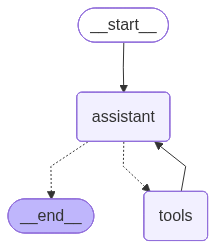

In [152]:
from langgraph.graph import START,StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image,display

builder = StateGraph(MessagesState)

builder.add_node("assistant",assistant)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"assistant")
builder.add_conditional_edges(
    'assistant',
    tools_condition
)
builder.add_edge("tools","assistant")
react_graph = builder.compile()

display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [156]:
messages=[HumanMessage(content='Add 10+5.Multiply the output by 3 and later divide by 9')]
response = react_graph.invoke({"messages":messages} )

In [157]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 10+5.Multiply the output by 3 and later divide by 9
================================== Ai Message ==================================
Tool Calls:
  add (call_spzWLcFC2ZkIzJvQkiW4wBvk)
 Call ID: call_spzWLcFC2ZkIzJvQkiW4wBvk
  Args:
    a: 10
    b: 5
================================= Tool Message =================================
Name: add

15
================================== Ai Message ==================================
Tool Calls:
  multiply (call_LNQoo3x4XsZPepWur4llUSjZ)
 Call ID: call_LNQoo3x4XsZPepWur4llUSjZ
  Args:
    a: 15
    b: 3
================================= Tool Message =================================
Name: multiply

45
================================== Ai Message ==================================
Tool Calls:
  divide (call_EyNh2wqwA86z9AjwoLWBZCpo)
 Call ID: call_EyNh2wqwA86z9AjwoLWBZCpo
  Args:
    a: 45
    b: 9
================================= Tool Message ==================